# BUFN400 Self Study Problems: Geometric Brownian Motion 
## By James Zhang

In [2]:
import pandas as pd
import numpy as np
import scipy
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# Problem 1

It can be shown that if $B(t)$ is a standard Brownian motion, then 

$$E[|B(t + \Delta t) - B(t)|] = \sqrt{\frac{2 * \Delta t}{\pi}}$$

Use this fact to prove (informally) that a Brownian motion sample path has infinite variation. Roughly speaking, infinite variation means that a pencil point would have to travel an infinite distance to draw a graph for one sample path of a Brownian motion as a function of time.

It is easy to use the Python package Numpy to model the sample paths of a Brownian motion by sampling at regularly spaced intervals.

Here is an example in which we model the daily stock price as Brownian motion with initial value of 100 dollars per share and a daily standard deviation of 2 dollars per day:

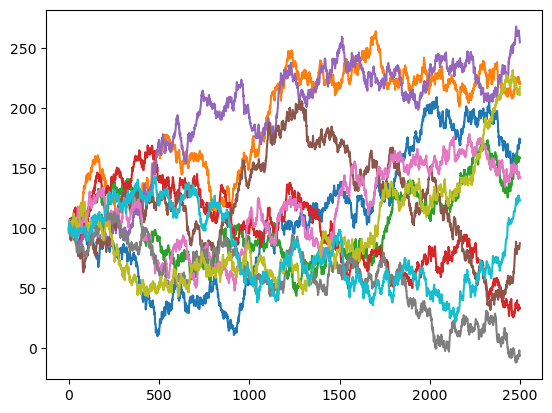

In [4]:
n = 2500
m = 10
p0 = 100.00
sigma = 2.00
rng = np.random.default_rng(seed=12345)
dz = rng.standard_normal(n * m).reshape(n, m)
z = p0 + sigma * dz.cumsum(axis=0)
plt.plot(z)
plt.show()

# Problem 2

Suppose we want to simulate 10 sample paths of a stock price with daily volatility of 2.00 percent and continuously compounded expected return of 10.00 percent per year (so one dollar grows in expectation to $e^{0.10 * m}$ years), with an initial stock price of 100 dollars, 250 trading days per year, for 10 years.

This is straightforward to do using the Python package Numpy:


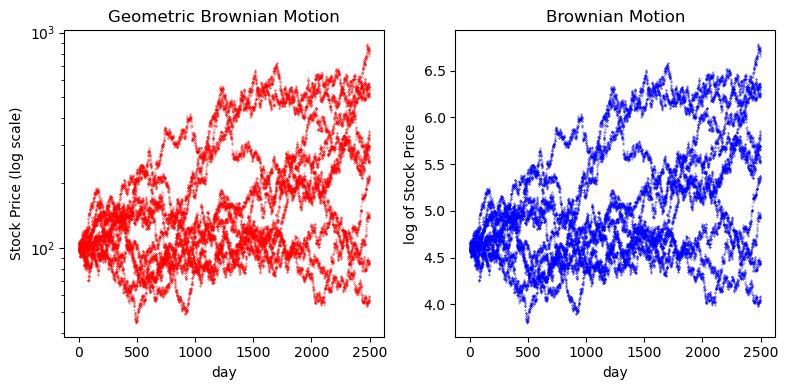

np.exp(rbar_per_year) - 1.00=0.10517091807564771
rmean_year=array([ 0.193192  ,  0.24436231,  0.17302862,  0.03446542,  0.28886832,
        0.09398726,  0.1548442 , -0.00796474,  0.24146702,  0.13600931])
dp_pct_std=array([0.02049635, 0.02014707, 0.01982738, 0.02006589, 0.01973004,
       0.02017327, 0.01991299, 0.01996315, 0.01983326, 0.02012401])


In [5]:
number_of_years = 10 
days_per_year = 250
m = 10  # number of stocks
rbar_per_year = 0.1000
p0 = 100.00
sigma = 0.0200 # daily volatility

n = number_of_years * days_per_year
rbar = rbar_per_year / days_per_year  # daily log-return for continuous compounding
#rbar = (1.00 + rbar_per_year)**(1.00 / days_per_year) - 1.00
#rbar = np.log1p(rbar_per_year) / days_per_year

mu = rbar - sigma * sigma * 0.50

rng = np.random.default_rng(seed=12345)
dz = rng.standard_normal(n * m).reshape(n, m)
P = p0 * np.exp((sigma * dz + mu).cumsum(axis=0))

# t = np.array(range(n))
t = np.full((n,), 1.00).cumsum() - 1.00  # more efficient than range(n)!

if n < 10000:

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    ax[0].set_title("Geometric Brownian Motion")
    ax[0].set_xlabel("day" )
    ax[0].set_ylabel("Stock Price (log scale)")
    ax[0].plot(t, P, 'ro', markersize=0.25)
    #ax[0].set_yscale('log', base=10)
    ax[0].set_yscale('log')

    ax[1].set_title("Brownian Motion")
    ax[1].set_xlabel("day")
    ax[1].set_ylabel("log of Stock Price")
    ax[1].plot(t, np.log(P), 'bo', markersize=0.25)

    plt.tight_layout() # Prevents plots from being squashed together too much.

    plt.show()

dp_pct = (P[1:, :] - P[:-1, :]) / P[:-1, :]   
rmean = dp_pct.mean(axis=0)
rmean_year = (1.00 + rmean)**days_per_year - 1.00

dp_pct_std = dp_pct.std(axis=0)

print(f"{np.exp(rbar_per_year) - 1.00=}")
print(f"{rmean_year=}")
print(f"{dp_pct_std=}")



When working with simulated data, it is often a good idea to debug code by checking that correct outcomes are generated when you can calculate the theoretically correct results in you head.

1. In the example above, verify that the sample mean is close to the theoretical mean when the standard deviation is very small.

2. Verfiy that the percentage standard deviation is close to the log standard deviation \sigma.

3. Change the problem so that data is generated monthly rather than daily, and the number of years is increased from 10 to 100.

NB: The example uses different time units for mean and standard deviation: annually for mean, daily for standard deviation. This is not a problem provided appropriate adjustments are made in the code itself.

# Problem 3
1. What are the units in which risk aversion $\rho$ and portfolio shares $\alpha$
  are measured?

2. Verify that the expected return on the portfolio is $r_f + \alpha * \pi$.